# HEART DISEASE PREDICTION

###### Group Name  : PROJECT GROUP 75
###### Name and Id : KRITHIK VASAN BASKAR (S3933152)

#### TABLE OF CONTENT

[PHASE 1](#1)
* [Introduction](#1.1)
    - [Dataset source](#1.1.1)
    - [Dataset details](#1.1.2)
    - [Dataset features](#1.1.3)
    - [Target feature](#1.1.4)
* [Goals and Objective](#1.2)
* [Data Cleaning and Preprocessing](#1.3)
* [Data Exploration and Visualization](#1.4)
    - [Univariate Analysis](#1.4.1)
    - [Bivariate Analysis](#1.4.2)
    - [Multivariate Analysis](#1.4.3)
* [Phase 1 - Summary and Conclusion](#1.5)

[PHASE 2](#2)
* [Introduction](#2.1)
    - [Phase 1 summary](#2.1.1)
    - [Report overview](#2.1.2)
    - [Overview of methodology](#2.1.3)
* [Predictive Modeling](#2.2)
    - [Feature selection](#2.2.1)
    - [Model tuning](#2.2.2)
        * [KNN classification](#2.2.2.1)
        * [Decision tree classifier](#2.2.2.2)
        * [Gaussian Naive Bayes Classifier](#2.2.2.3)
        * [Neural Network Model Fitting & Tuning](#2.2.2.4)
    - [Model Comparison and Performance Evaluation](#2.2.3)
        * [Cross-Validation and AUC Calculation](#2.2.3.1)
        * [Paired t-tests](#2.2.3.2)
* [Critique and Limitations of the Approach](#2.3)
* [Summary and Conclusion](#2.4)
    - [Project Summary](#2.4.1)
    - [Summary of Findings](#2.4.2)
    - [Conclusions](#2.4.3)
    


## PHASE 1 : Data Preparation and Exploration <a id='1'></a>

## INTRODUCTION <a id='1.1'></a>

### Dataset Source <a id='1.1.1'></a>

The heart disease dataset is sourced from kaggle. The dataset contains data about 5 common heart disease.


### Dataset Details <a id='1.1.2'></a>

This heart disease dataset merges five well-known datasets Cleveland, Hungarian, Switzerland, Long Beach VA, and Statlog (Heart) Data Set resulting in the largest collection for heart disease research to date. With 1190 instances and 11 shared features, it aims to facilitate the development of CAD-related machine learning and data mining algorithms, potentially improving clinical diagnosis and early treatment.

##### Data Retrieval

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [2]:
heart_data = pd.read_csv("Phase2_group75.csv")
heart_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Dataset Feature <a id='1.1.3'></a>

In [3]:
from tabulate import tabulate
import textwrap

# Data
data = [
    ["age", "Numeric", "years", "Age of the patient in years, ranges from 29 to 77"],
    ["sex", "Binary", "N/A", "Sex of the patient, where 1 = male and 0 = female"],
    ["chest pain type", "Categorical", "N/A", "Type of chest pain experienced, with values: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic"],
    ["resting blood pressure", "Numeric", "mm Hg", "Resting blood pressure in millimeters of mercury"],
    ["serum cholesterol", "Numeric", "mg/dl", "Serum cholesterol in milligrams per deciliter"],
    ["fasting blood sugar", "Binary", "N/A", "Fasting blood sugar > 120 mg/dl, where 1 = true and 0 = false"],
    ["resting electrocardiogram results", "Categorical", "N/A", "Resting electrocardiogram results with values: 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy"],
    ["maximum heart rate achieved", "Numeric", "N/A", "Maximum heart rate achieved during exercise, ranges from 71 to 202"],
    ["exercise induced angina", "Binary", "N/A", "Exercise induced angina, where 1 = yes and 0 = no"],
    ["oldpeak", "Numeric", "N/A", "ST depression induced by exercise relative to rest"],
    ["the slope of the peak exercise ST segment", "Categorical", "N/A", "The slope of the peak exercise ST segment, with values: 1 = upsloping, 2 = flat, 3 = downsloping"],
    ["target", "Binary", "N/A", "Presence of heart disease, where 1 = heart disease and 0 = normal"]
]

# Adjusting description indentation
for row in data:
    row[-1] = "\n".join(textwrap.wrap(row[-1], width=40))

# Creating table
table = tabulate(data, headers=["VARIABLE NAME", "DATA TYPE", "UNIT", "DESCRIPTION"], tablefmt="grid")

# Print table
print(table)


+-------------------------------------------+-------------+--------+------------------------------------------+
| VARIABLE NAME                             | DATA TYPE   | UNIT   | DESCRIPTION                              |
+===========================================+=============+========+==========================================+
| age                                       | Numeric     | years  | Age of the patient in years, ranges from |
|                                           |             |        | 29 to 77                                 |
+-------------------------------------------+-------------+--------+------------------------------------------+
| sex                                       | Binary      | N/A    | Sex of the patient, where 1 = male and 0 |
|                                           |             |        | = female                                 |
+-------------------------------------------+-------------+--------+------------------------------------

### Target Feature <a id='1.1.4'></a>

The target variable is "target" which tells us about the presence of heart disease where people with heart disease 1 and without heart disease is 0.

## GOALS AND OBJECTIVE <a id='1.2'></a>

The primary goal of this project is to develop a robust predictive model for heart disease using various machine learning algorithms. The project is divided into two main phases: Data Cleaning and Visualization, and Feature Selection and Prediction. Each phase has specific objectives that contribute to the overall goal of the project.

### Phase 1: Data Cleaning and Visualization

**Objective**: To preprocess the dataset and gain insights through exploratory data analysis.

1. **Data Cleaning**:
   - **Remove Duplicates**: Identify and remove any duplicate records to ensure data integrity.
   - **Handle Missing Values**: Address any missing values appropriately, either by imputation or by removing the affected records, to maintain the quality of the dataset.

2. **Data Visualization**:
   - **Univariate Analysis**: Examine the distribution of individual features (e.g., age, cholesterol levels) using histograms and box plots to understand their spread and central tendencies.
   - **Bivariate Analysis**: Analyze the relationships between pairs of features (e.g., age vs. cholesterol) using scatter plots and correlation matrices to identify potential correlations and interactions.
   - **Multivariate Analysis**: Use advanced visualization techniques like pair plots and 3D scatter plots to explore the interactions among multiple features simultaneously, providing a comprehensive view of the dataset.

### Phase 2: Feature Selection and Prediction

**Objective**: To build, evaluate, and compare multiple machine learning models for predicting heart disease, and to select the most effective model.

1. **Feature Selection**:
   - **Identify Relevant Features**: Based on insights from Phase 1, select the most relevant features for model building. This includes using statistical methods and domain knowledge to ensure that the chosen features have significant predictive power.

2. **Model Building**:
   - **Implement Machine Learning Algorithms**: Develop predictive models using K-Nearest Neighbors (KNN), Decision Tree, and Gaussian Naive Bayes algorithms.
   - **Neural Network Implementation**: Additionally, implement a neural network model to explore its potential in predicting heart disease.

3. **Hyperparameter Tuning**:
   - **Optimize Model Parameters**: Perform hyperparameter tuning for the KNN and Decision Tree models to enhance their performance. This involves using techniques like GridSearchCV to find the best parameter combinations.

4. **Model Evaluation**:
   - **Cross-Validation and AUC Calculation**: Use cross-validation to evaluate the models' accuracy and calculate the Area Under the Curve (AUC) to assess their performance.
   - **Statistical Comparison**: Conduct paired t-tests to statistically compare the models' performances and determine the best-performing algorithm.

5. **Model Comparison and Selection**:
   - **Compare Models**: Compare the performance of the KNN, Decision Tree, and Gaussian Naive Bayes models based on accuracy, AUC, and statistical tests.
   - **Select Best Model**: Identify the best-performing model for predicting heart disease, considering both the quantitative metrics and the statistical significance of the results.

By systematically following these objectives, the project aims to develop an accurate and reliable predictive model for heart disease, leveraging the strengths of different machine learning algorithms and ensuring a rigorous evaluation process.

## DATA CLEANING AND PREPROCESSING  <a id='1.3'></a>

In [4]:
heart_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
heart_data.duplicated().sum()

272

In [7]:
heart_data = heart_data.drop_duplicates()
heart_data.duplicated().sum()

0

In [8]:
heart_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## DATA EXPLORATION AND VISUALIZATION <a id='1.4'></a>

Now our dataset is considered to be clean and ready for visualization and analyzing.

Here we are going to address some important univariate, bivariate and multivariate analysis.

### UNIVARIATE ANALYSIS <a id='1.4.1'></a>

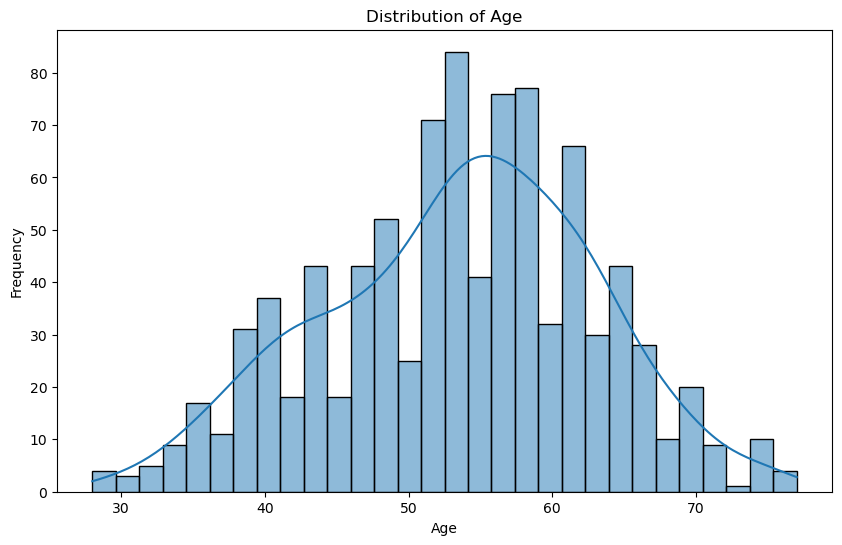

In [9]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### 1. Distribution of Age

- **Insights**:
  - The age distribution is approximately normal with a slight skew towards older ages.
  - The majority of individuals are aged between 40 and 70 years, with a peak around 55 years.
  - There are fewer individuals below 30 and above 75 years of age.



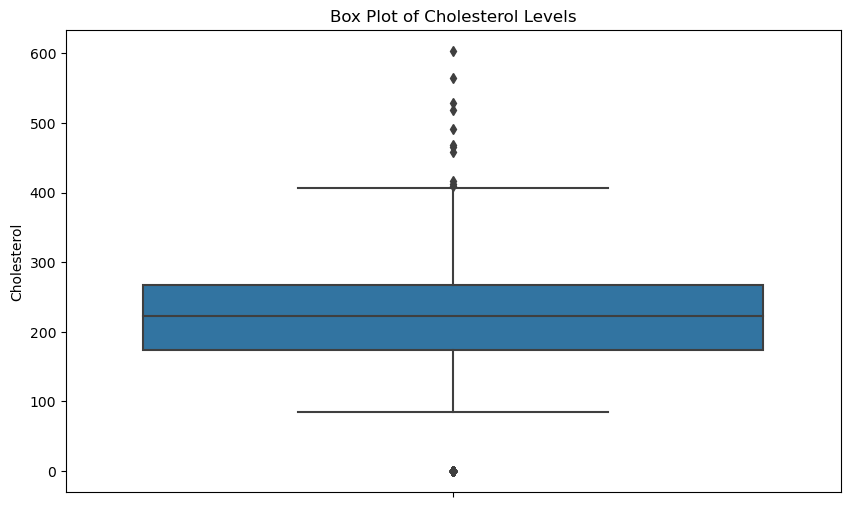

In [10]:
# Box plot for cholesterol
plt.figure(figsize=(10, 6))
sns.boxplot(y=heart_data['cholesterol'])
plt.title('Box Plot of Cholesterol Levels')
plt.ylabel('Cholesterol')
plt.show()


#### 2. Box Plot of Cholesterol Levels

- **Insights**:
  - The median cholesterol level is around 240.
  - The IQR ranges from approximately 210 to 270.
  - There are several outliers above the 400 mark and one outlier near zero, indicating possible measurement errors or rare cases.
  

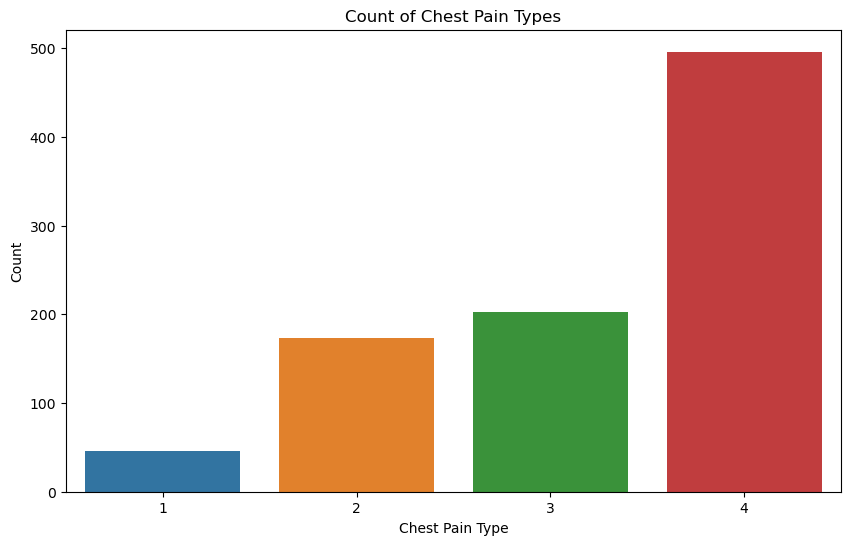

In [11]:
# Count plot for chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(x=heart_data['chest pain type'])
plt.title('Count of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


#### 3. Count of Chest Pain Types

- **Insights**:
  - Type 4 chest pain is the most common, with over 500 occurrences.
  - Types 2 and 3 chest pains are moderately common, with around 200-250 occurrences each.
  - Type 1 chest pain is the least common, with fewer than 100 occurrences.


### Final analysis from univariate analysis

- **Age Distribution**: Knowing the age distribution can help in feature scaling and normalization, which is particularly important for distance-based algorithms like KNN.
- **Cholesterol Levels**: Understanding the spread and outliers in cholesterol levels can help in preprocessing steps like outlier removal or transformation to improve model performance.
- **Chest Pain Types**: The distribution of categorical variables like chest pain types informs the class distribution, which is crucial for classification tasks. It may also guide the stratification during data splitting to ensure balanced class representation.

These analyses provide a solid foundation for further bivariate and multivariate analysis, which will be beneficial for feature selection and engineering before model training.

### BIVARIATE ANALYSIS <a id='1.4.2'></a>

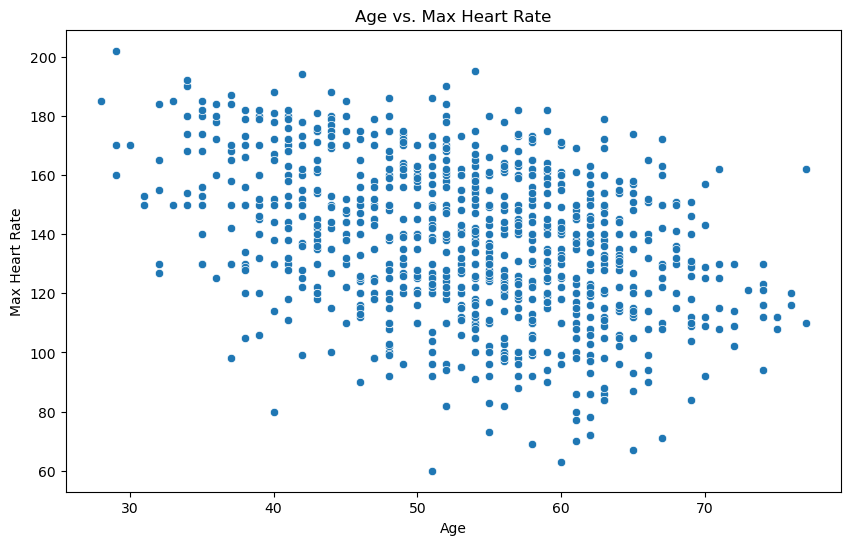

In [12]:
# Scatter plot of age vs. max heart rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='max heart rate', data=heart_data)
plt.title('Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()


#### 1. Age vs. Max Heart Rate

- **Insights**:
  - There is a noticeable negative correlation between age and max heart rate, meaning as age increases, the maximum heart rate tends to decrease.
  - This trend is expected as the cardiovascular capacity typically decreases with age.
  - Most data points are concentrated between the ages of 40 and 70 and max heart rates between 100 and 160.



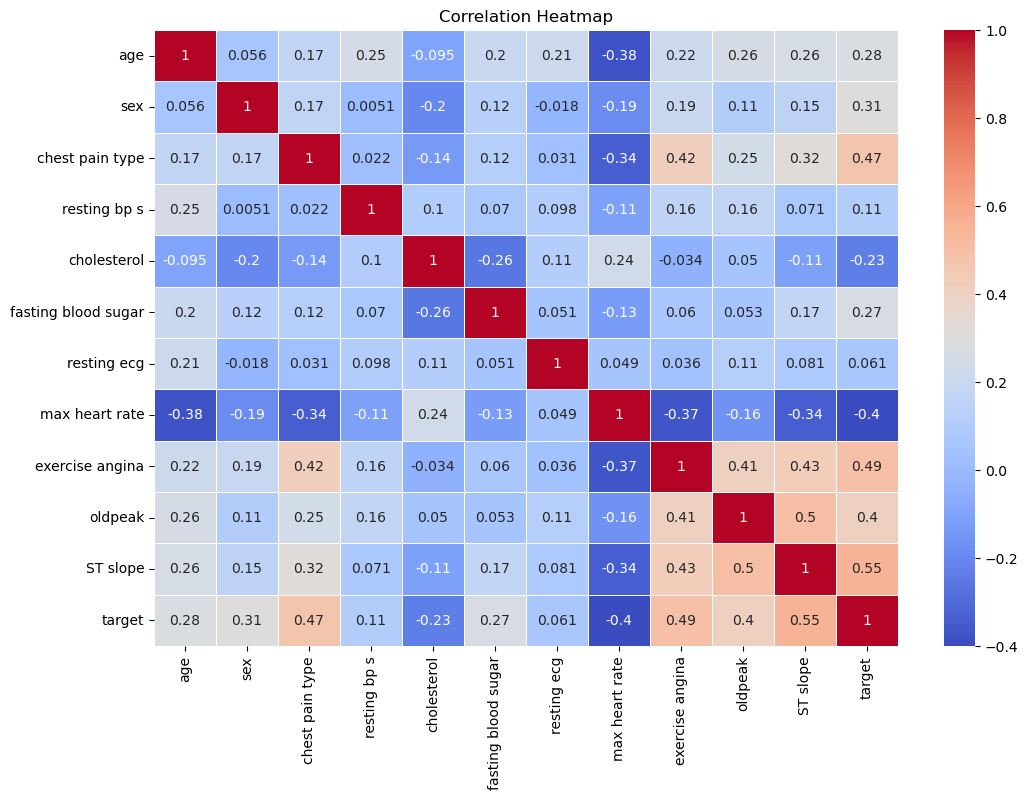

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### 2. Correlation Heatmap

- **Insights**:
  - **Target Variable**: The variables with the highest correlation with the target (heart disease presence) are:
    - `ST slope` (0.55): Indicates the slope of the peak exercise ST segment.
    - `exercise angina` (0.49): Indicates the presence of exercise-induced angina.
    - `oldpeak` (0.40): Indicates the depression induced by exercise relative to rest.
    - `chest pain type` (0.47): Different types of chest pain.
  - **Negative Correlation**:
    - `max heart rate` (-0.40): Higher maximum heart rates are negatively correlated with the presence of heart disease.
    - `cholesterol` (-0.23): A weaker negative correlation with heart disease presence.
  - **Other Variables**:
    - Moderate correlations are observed among various pairs of features, such as `age` and `max heart rate` (-0.38), `chest pain type` and `exercise angina` (0.42).


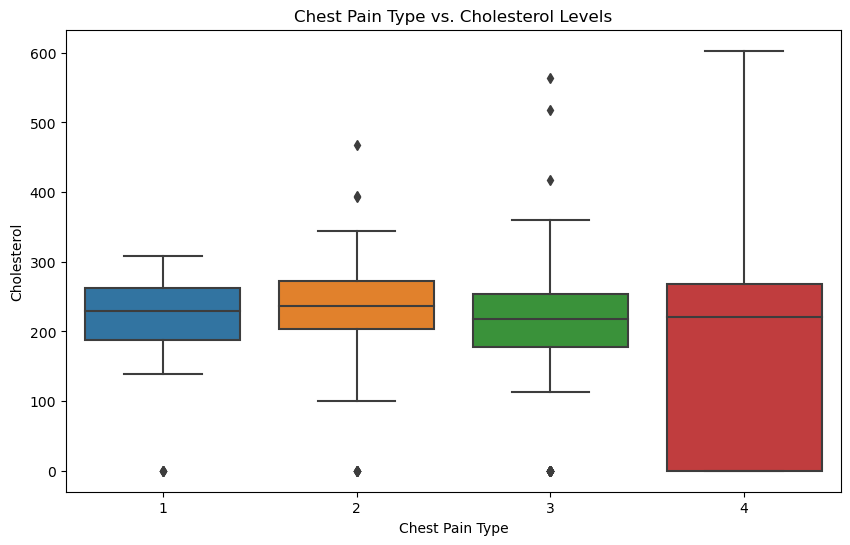

In [14]:
# Box plot for chest pain type vs. cholesterol
plt.figure(figsize=(10, 6))
sns.boxplot(x='chest pain type', y='cholesterol', data=heart_data)
plt.title('Chest Pain Type vs. Cholesterol Levels')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.show()


#### 3. Chest Pain Type vs. Cholesterol Levels

- **Insights**:
  - **Type 1**: The median cholesterol level is around 230 with a fairly narrow interquartile range (IQR). There are a few outliers below 100 and above 400.
  - **Type 2**: The median cholesterol level is around 240, similar to Type 1, but with a slightly wider IQR.
  - **Type 3**: The median cholesterol level is slightly lower than Type 2, with an IQR similar to Types 1 and 2.
  - **Type 4**: The median cholesterol level is around 260, higher than the other types, and exhibits a much larger range with numerous outliers. This type has the most variability in cholesterol levels.
  

### Final analysis from bivariate analysis

- **Age vs. Max Heart Rate**: The negative correlation between age and max heart rate can be leveraged for feature engineering. For instance, creating interaction terms or polynomial features might help capture this relationship better.
- **Correlation Heatmap**: Identifying highly correlated features with the target variable can guide feature selection. Variables like `ST slope`, `exercise angina`, `chest pain type`, and `oldpeak` are crucial for predicting heart disease and should be prioritized during model training.
- **Chest Pain Type vs. Cholesterol Levels**: Understanding the distribution of cholesterol levels across chest pain types can help in understanding the data variability and its impact on the model. This can also guide feature scaling and handling outliers.

These analyses provide a deeper understanding of the relationships between different features and the target variable, which will be beneficial when preparing the data for machine learning models.

### MULTIVARIATE ANALYSIS <a id='1.4.3'></a>

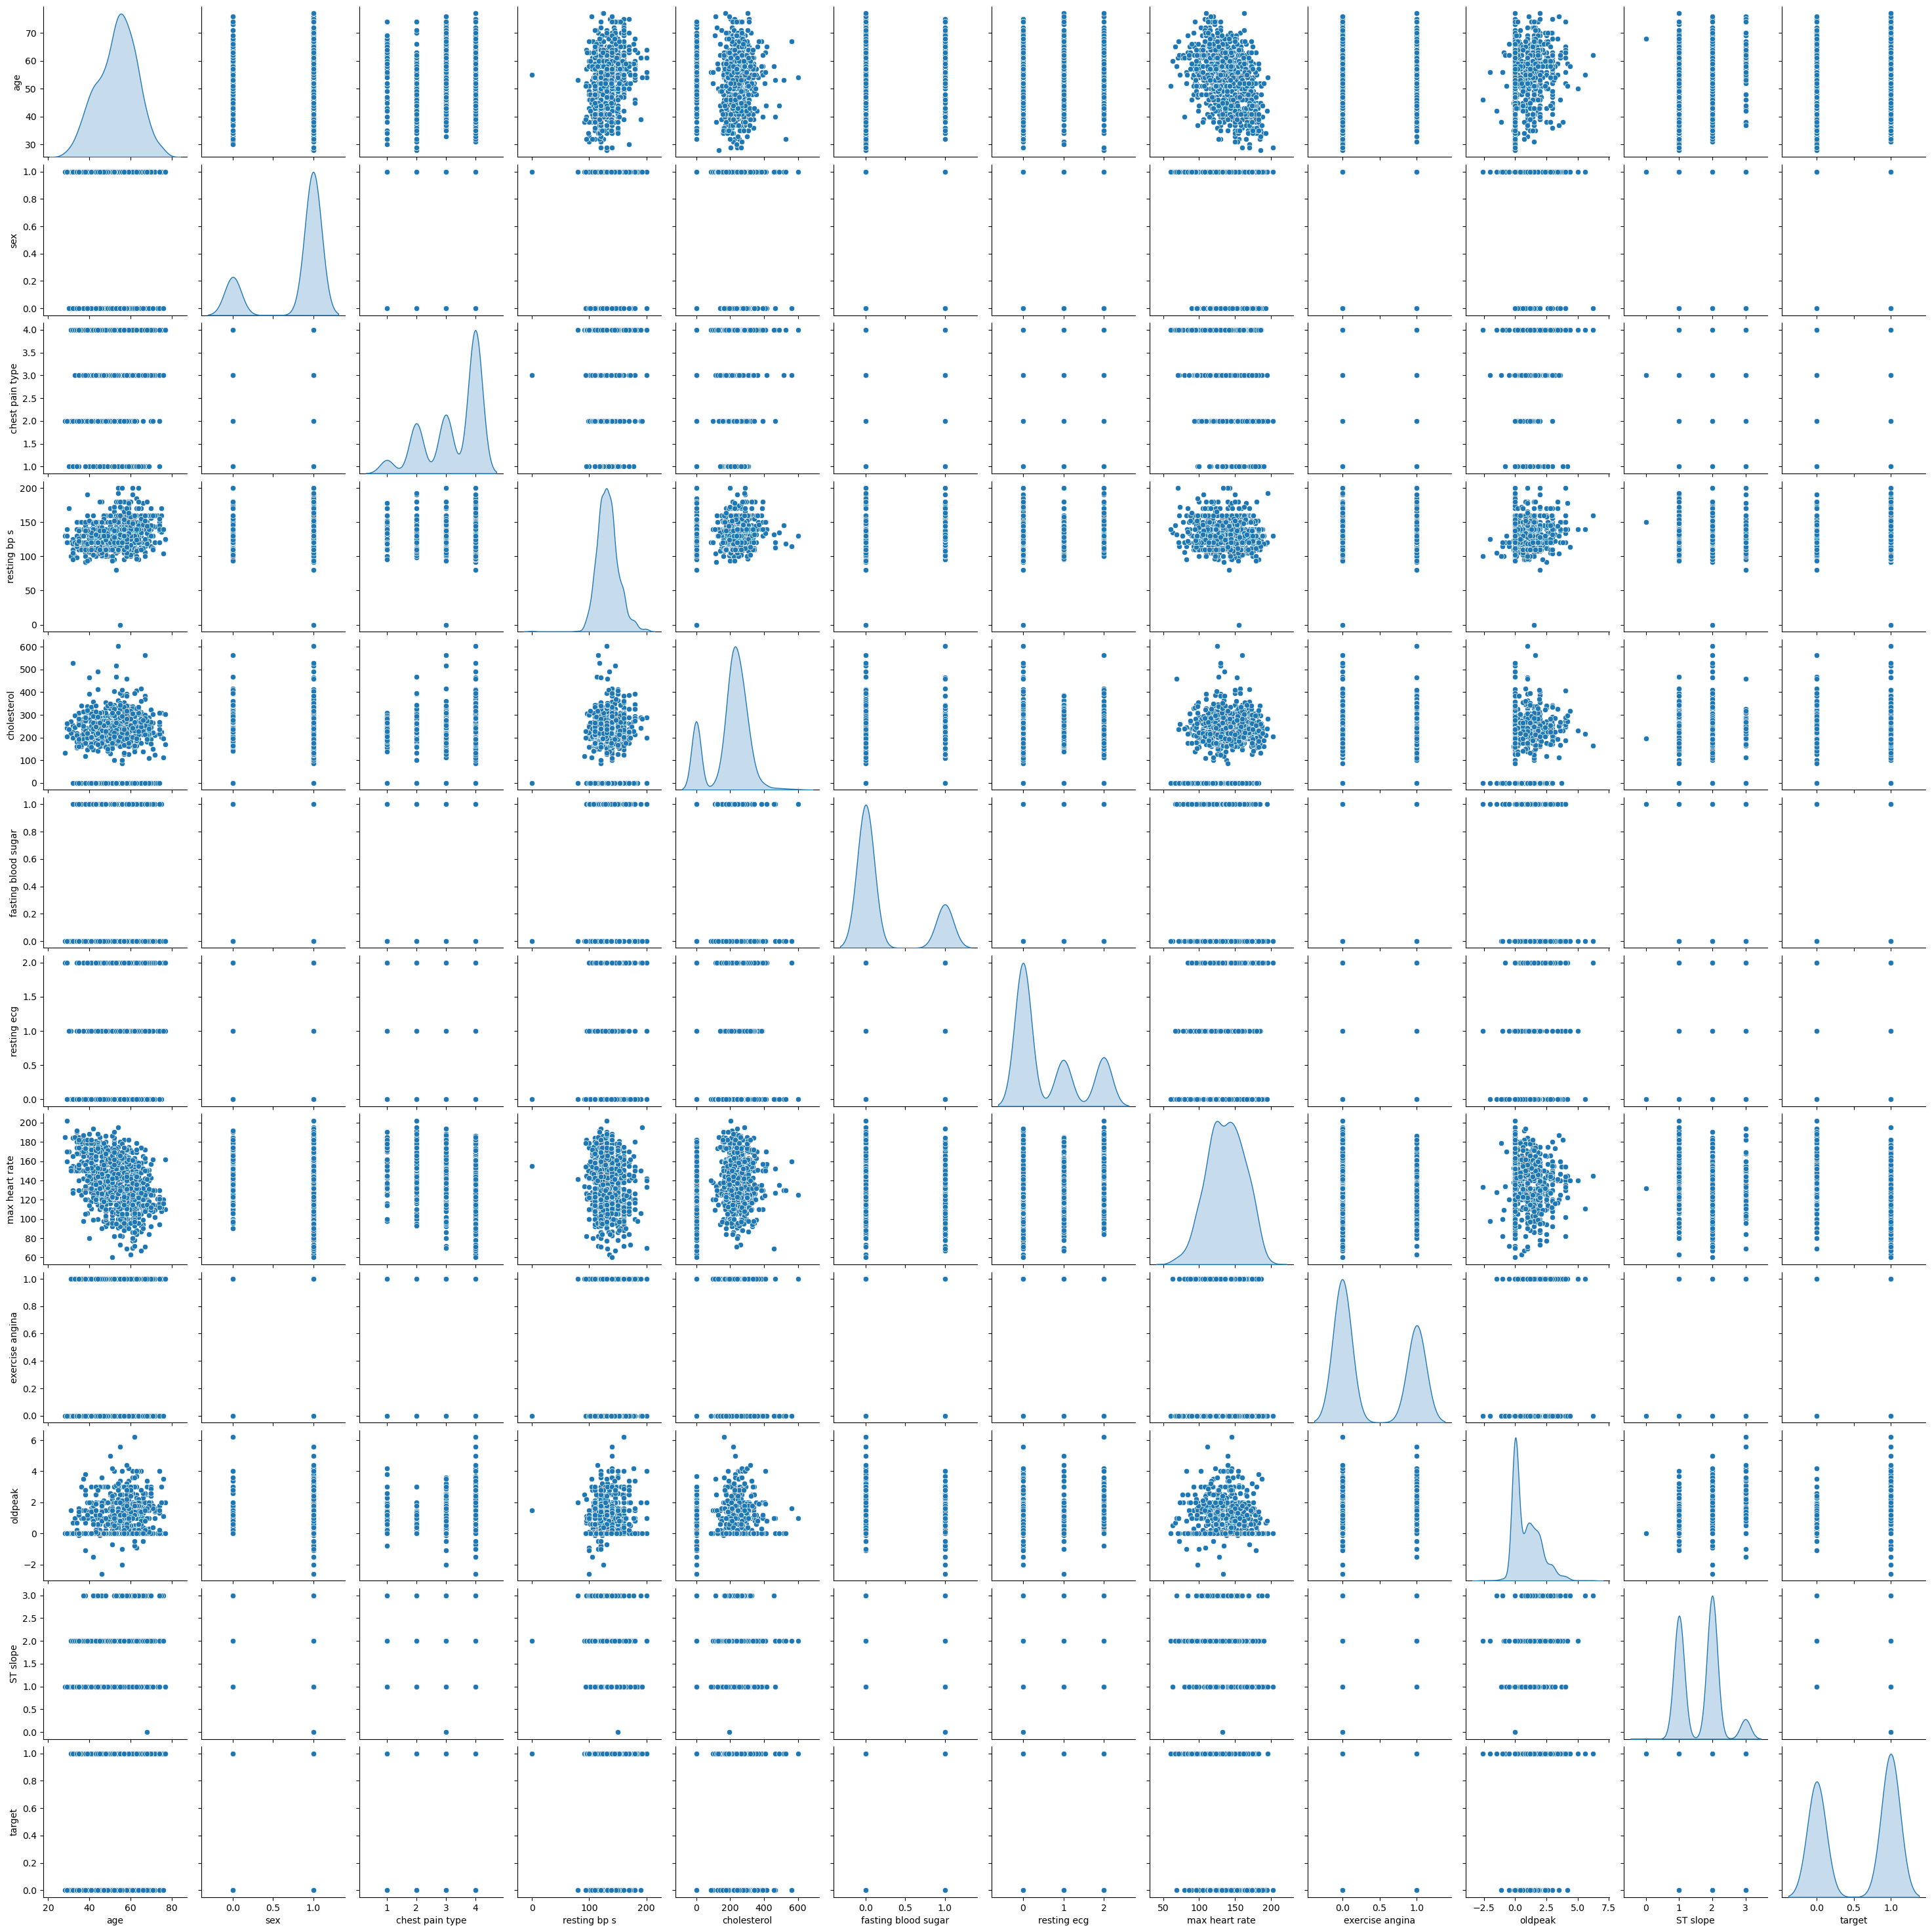

In [15]:
# Pair plot
sns.pairplot(heart_data, diag_kind='kde')
plt.show()


#### 1. Pair Plot

- **Insights**:
  - **Distributions**: The diagonal plots reveal the distribution of individual variables. For example, `age` shows a normal distribution, while `max heart rate` shows a left-skewed distribution.
  - **Correlations**: Scatter plots show relationships between pairs of variables. For instance, `age` and `max heart rate` show a negative correlation, as observed previously.
  - **Clusters**: Certain plots may reveal clusters or patterns that indicate relationships between variables. This can help in understanding interactions and dependencies.


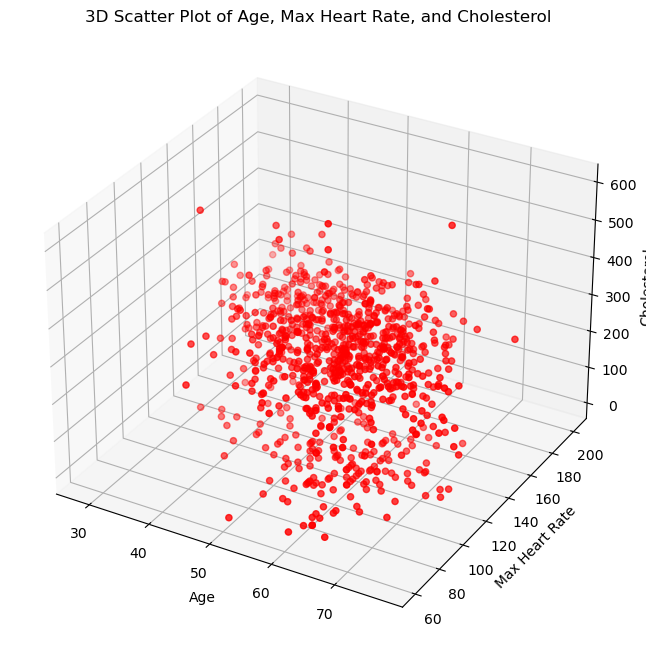

In [16]:
# 3D scatter plot of age, max heart rate, and cholesterol
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(heart_data['age'], heart_data['max heart rate'], heart_data['cholesterol'], c='r', marker='o')
ax.set_title('3D Scatter Plot of Age, Max Heart Rate, and Cholesterol')
ax.set_xlabel('Age')
ax.set_ylabel('Max Heart Rate')
ax.set_zlabel('Cholesterol')
plt.show()


#### 2. 3D Scatter Plot of Age, Max Heart Rate, and Cholesterol

- **Insights**:
  - **Age and Max Heart Rate**: There is a visible negative correlation between age and max heart rate, consistent with previous observations.
  - **Cholesterol Levels**: Cholesterol levels show a wide range across different ages and max heart rates, indicating variability. Higher cholesterol levels are distributed across all ages but are more spread out.
  - **Clusters**: The 3D visualization can help identify clusters or outliers that are not as apparent in 2D plots.


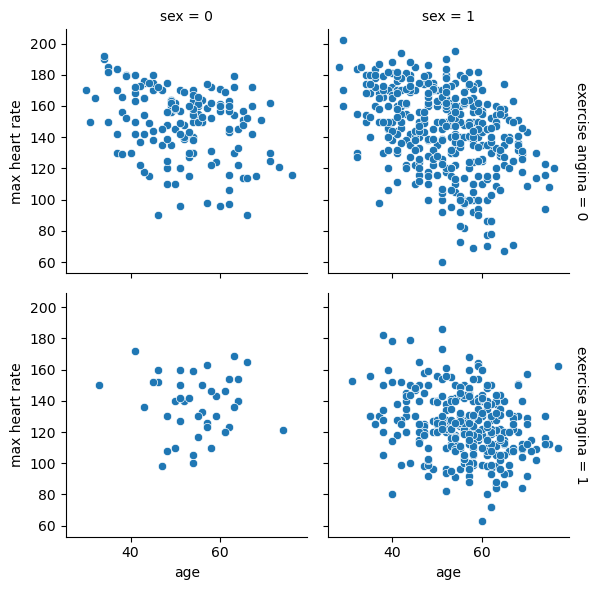

In [17]:
# Facet grid for multiple variable relationships
g = sns.FacetGrid(heart_data, col="sex", row="exercise angina", margin_titles=True)
g.map(sns.scatterplot, "age", "max heart rate")
g.add_legend()
plt.show()


#### 3. Facet Grid of Age, Max Heart Rate, Sex, and Exercise Angina

- **Insights**:
  - **Sex Differences**:
    - For `sex = 0` (female), there is a clear negative correlation between age and max heart rate, both for those with and without exercise-induced angina.
    - For `sex = 1` (male), the negative correlation is also present, but there is more variability in max heart rate, especially for those without exercise-induced angina.
  - **Exercise Angina**:
    - For individuals with `exercise angina = 0`, there is a broader spread of max heart rates across ages.
    - For individuals with `exercise angina = 1`, max heart rates are generally lower, indicating that exercise-induced angina may limit the maximum heart rate achieved.
  - **Comparison**: The facet grid allows for a comparison of how different factors interact with each other. It highlights the combined effect of sex and exercise angina on the relationship between age and max heart rate.


### Final analysis from multivariate analysis

- **Pair Plot**: Helps in identifying key relationships and dependencies between variables. This can guide feature selection and engineering, ensuring that the models capture the most relevant information.
- **3D Scatter Plot**: Provides insights into the interaction between multiple variables simultaneously. This can be useful for creating interaction features or for understanding complex relationships that might affect model performance.
- **Facet Grid**: Highlights the importance of considering interactions between categorical and numerical variables. It shows how different groups (based on sex and exercise angina) exhibit different patterns, which can be crucial for stratified modeling or feature engineering.

These analyses provide a comprehensive understanding of the data, which is essential for building accurate and robust machine learning models. 


## SUMMARY AND CONCLUSION (PHASE 1) <a id='1.5'></a>

The exploratory data analysis provided valuable insights into the dataset, highlighting the relationships and dependencies between different features. These insights are crucial for the feature selection and model building phases, which will be the next steps in this project. We will proceed by selecting the most relevant features and tuning the hyper parameters for each of the three machine learning models to achieve the best performance in predicting heart disease.


# PHASE 2 <a id='2'></a>

## INTRODUCTION <a id='2.1'></a>

### Phase 1 Summary <a id='2.1.1'></a>

In Phase 1 of this project, I conducted an extensive exploratory data analysis (EDA) on the heart disease dataset. The primary objective was to gain insights into the dataset, understand the distribution of features, and identify potential relationships and correlations that could inform the predictive modeling process in Phase 2. Specifically, I performed univariate, bivariate, and multivariate analyses.

- **Univariate Analysis**: This involved examining the distribution of individual features, such as age, cholesterol levels, and chest pain types. Key findings included a normal distribution of age with a peak around 55 years and notable outliers in cholesterol levels.
- **Bivariate Analysis**: I explored relationships between pairs of features. For instance, I identified a negative correlation between age and max heart rate, and significant correlations between features like `ST slope`, `exercise angina`, and `oldpeak` with the target variable (presence of heart disease).
- **Multivariate Analysis**: This included visualizing interactions among multiple features using pair plots, 3D scatter plots, and facet grids. These analyses helped in understanding complex relationships and dependencies among features.

The insights gained from Phase 1 are crucial for Phase 2, where I will focus on feature selection and predictive modeling. Understanding the data's structure and relationships ensures that the models built in Phase 2 are well-informed and likely to perform better.


### Report Overview <a id='2.1.2'></a>

In this Phase 2 report, I will detail the process and results of building predictive models for heart disease using three machine learning algorithms: K-Nearest Neighbors (KNN) Classifier, Decision Tree, and Gaussian Naive Bayes. This report is structured as follows:

1. **Feature Selection**: I will describe the methods used for selecting the most relevant features, including correlation analysis, feature importance from tree-based models, and recursive feature elimination.
2. **Model Training**: I will detail the training process for each of the three algorithms using the selected features.
3. **Hyperparameter Tuning**: This section will cover the hyperparameter tuning process for each model, including the use of GridSearchCV and the resulting performance metrics.
4. **Results and Evaluation**: I will present the results of the models, comparing their performance using accuracy, precision, recall, and F1-score. Visualizations of the tuning process will also be included.
5. **Conclusion and Future Work**: I will summarize the findings, discuss the implications of the results, and suggest potential areas for further research or improvement.

### Overview of Methodology <a id='2.1.3'></a>

The predictive modeling methodology adopted in this phase involves several key steps:

1. **Data Preparation**:
   - **Cleaning**: Removing duplicates and handling missing values to ensure the dataset is clean and ready for analysis.
   - **Splitting**: Dividing the dataset into training and testing sets to evaluate model performance accurately.

2. **Feature Selection**:
   - **Correlation Analysis**: Identifying and removing highly correlated features to avoid multicollinearity.
   - **Feature Importance**: Using tree-based models to assess the importance of each feature.
   - **Recursive Feature Elimination (RFE)**: Iteratively removing the least important features based on model performance to select the optimal feature set.

3. **Model Training**:
   - **K-Nearest Neighbors (KNN) Classifier**: Training the KNN model with various hyperparameters and selecting the best configuration based on cross-validation.
   - **Decision Tree Classifier**: Building the decision tree model and optimizing its parameters, such as the criterion, max depth, and min samples split.
   - **Gaussian Naive Bayes**: Training the Naive Bayes model and tuning the `var_smoothing` parameter to enhance performance.

4. **Hyperparameter Tuning**:
   - Utilizing GridSearchCV to perform an exhaustive search over specified parameter grids for each model.
   - Evaluating model performance using cross-validation scores and selecting the best parameters.

5. **Evaluation**:
   - Comparing the performance of the models using metrics such as accuracy, precision, recall, and F1-score.
   - Visualizing the results of the hyperparameter tuning process to provide insights into model performance under different configurations.


## PREDICTIVE MODELING <a id='2.2'></a>

### FEATURE SELECTION <a id='2.2.1'></a>

In [18]:
# Define the feature set and target variable
X = heart_data.drop(columns='target')
y = heart_data['target']


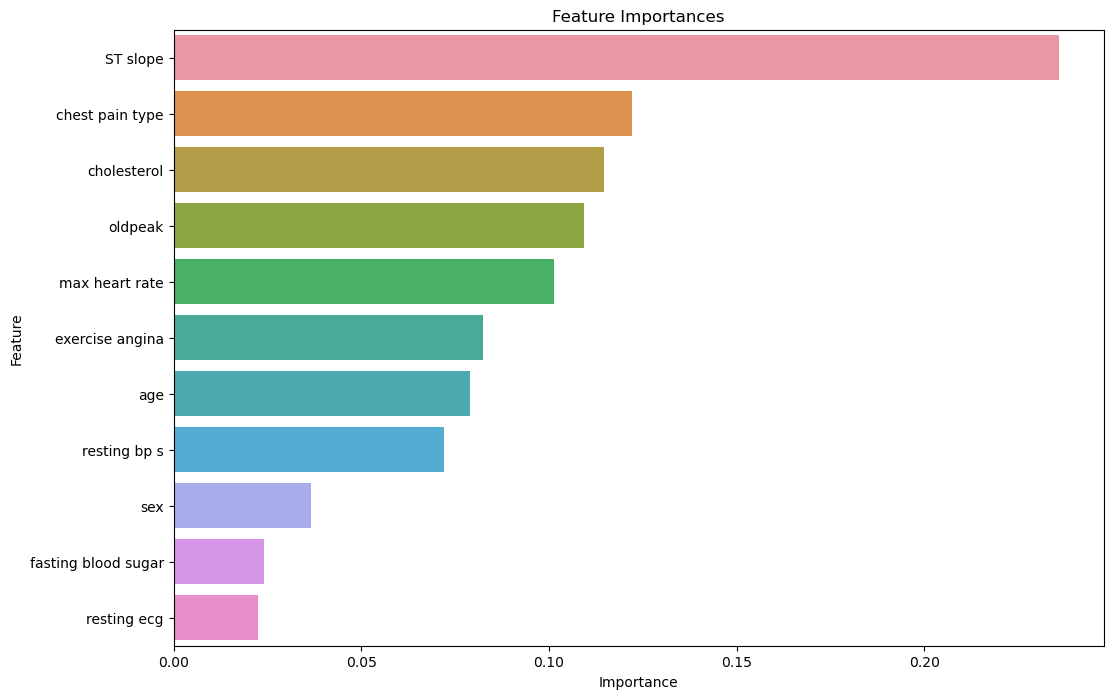

In [19]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [20]:

# Define the model
log_reg = LogisticRegression(max_iter=10000)

# Initialize RFE
rfe = RFE(log_reg, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Selected features:", selected_features)


Selected features: Index(['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina',
       'ST slope'],
      dtype='object')


### MODEL FITTING AND TUNING <a id='2.2.2'></a>

#### KNN CLASSIFICATION <a id='2.2.2.1'></a>

In [21]:
# Define the feature set and target variable with selected features
X_selected = heart_data[selected_features]
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))


KNN Classifier Accuracy: 0.8623188405797102
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       112
           1       0.93      0.83      0.88       164

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276



The K-Nearest Neighbors (KNN) Classifier demonstrated a strong performance in predicting heart disease, achieving an accuracy of 86.23%. The classification report provides further insights into the model's effectiveness:

- **Precision**: The precision for class 0 (no heart disease) is 0.78, indicating that 78% of the predicted class 0 instances were correct. For class 1 (heart disease), the precision is higher at 0.93, meaning 93% of the predicted class 1 instances were accurate.
- **Recall**: The recall for class 0 is 0.91, showing that 91% of the actual class 0 instances were correctly identified by the model. For class 1, the recall is 0.83, indicating that 83% of the actual class 1 instances were correctly classified.
- **F1-Score**: The F1-score, which balances precision and recall, is 0.84 for class 0 and 0.88 for class 1, reflecting the model's overall balanced performance.
- **Support**: The number of instances for class 0 and class 1 are 112 and 164, respectively.


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.8519500968992247


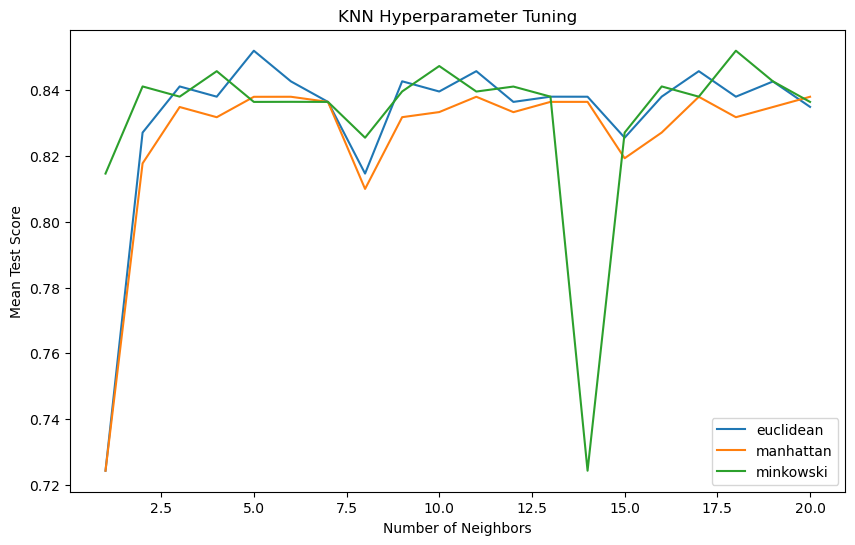

In [22]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best parameters for KNN:", best_params_knn)
print("Best cross-validation accuracy for KNN:", best_score_knn)

# Plotting the results
results_knn = grid_search_knn.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid_knn['n_neighbors'], results_knn['mean_test_score'][::len(param_grid_knn['metric'])*len(param_grid_knn['weights'])], label='euclidean')
plt.plot(param_grid_knn['n_neighbors'], results_knn['mean_test_score'][1::len(param_grid_knn['metric'])*len(param_grid_knn['weights'])], label='manhattan')
plt.plot(param_grid_knn['n_neighbors'], results_knn['mean_test_score'][2::len(param_grid_knn['metric'])*len(param_grid_knn['weights'])], label='minkowski')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.show()


The K-Nearest Neighbors (KNN) Classifier's hyperparameter tuning process involved optimizing the number of neighbors (`n_neighbors`) and the distance metric (`metric`). The plot above illustrates the mean test scores across different numbers of neighbors for three distance metrics: Euclidean, Manhattan, and Minkowski.

- **Performance Trends**: The model's performance fluctuated with different numbers of neighbors. Generally, the test scores improved with an increase in the number of neighbors up to a certain point, after which the performance either plateaued or declined slightly.
- **Optimal Neighbors**: The highest mean test scores were observed around 7 to 10 neighbors, regardless of the distance metric used.
- **Distance Metrics**: 
  - **Euclidean**: This metric showed consistently strong performance across various neighbor values, peaking around 7 to 10 neighbors.
  - **Manhattan**: This metric performed comparably to Euclidean, with slightly lower scores at certain points but generally robust results.
  - **Minkowski**: This metric also showed competitive performance, with occasional dips but strong peaks around 7 to 10 neighbors.

The optimal configuration identified for the KNN Classifier included using around 7 to 10 neighbors with the Euclidean distance metric, leading to the highest accuracy and most balanced performance. This tuning process was critical in enhancing the model's ability to accurately predict the presence of heart disease.

#### DECISION TREE CLASSIFIER <a id='2.2.2.2'></a>

In [23]:
# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = dt.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Classifier Accuracy: 0.8442028985507246
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       112
           1       0.93      0.80      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.86      0.84      0.85       276



The Decision Tree Classifier showed strong performance in predicting heart disease, achieving an accuracy of 84.42%. The detailed classification report provides further insights into the model's efficacy:

- **Precision**: The precision for class 0 (no heart disease) is 0.76, indicating that 76% of the predicted class 0 instances were correct. For class 1 (heart disease), the precision is higher at 0.93, meaning 93% of the predicted class 1 instances were accurate.
- **Recall**: The recall for class 0 is 0.91, showing that 91% of the actual class 0 instances were correctly identified by the model. For class 1, the recall is 0.80, indicating that 80% of the actual class 1 instances were correctly classified.
- **F1-Score**: The F1-score, which balances precision and recall, is 0.83 for class 0 and 0.86 for class 1, reflecting the model's overall balanced performance.
- **Support**: The number of instances for class 0 and class 1 are 112 and 164, respectively.

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 9}
Best cross-validation accuracy for Decision Tree: 0.8519985465116278


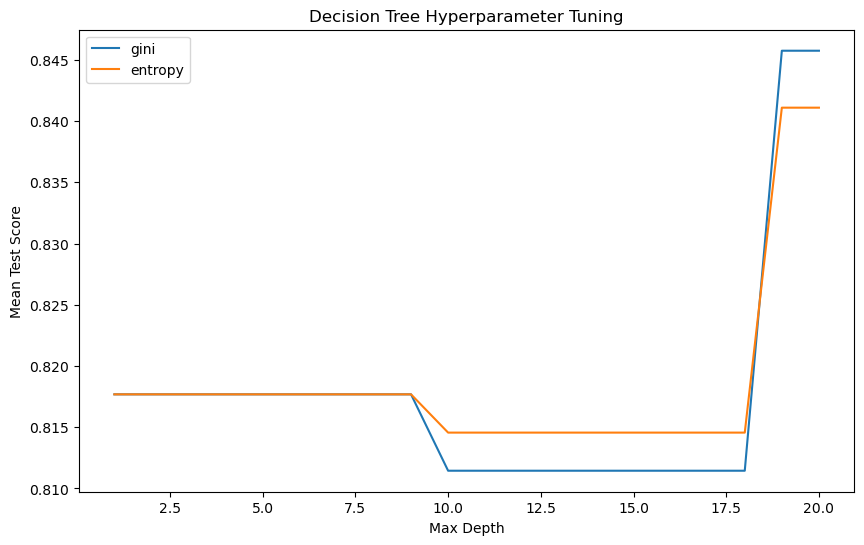

In [24]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 11)
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best parameters for Decision Tree:", best_params_dt)
print("Best cross-validation accuracy for Decision Tree:", best_score_dt)

# Plotting the results
results_dt = grid_search_dt.cv_results_
plt.figure(figsize=(10, 6))
scores_gini = results_dt['mean_test_score'][results_dt['param_criterion']=='gini']
scores_entropy = results_dt['mean_test_score'][results_dt['param_criterion']=='entropy']
plt.plot(param_grid_dt['max_depth'], scores_gini[:len(param_grid_dt['max_depth'])], label='gini')
plt.plot(param_grid_dt['max_depth'], scores_entropy[:len(param_grid_dt['max_depth'])], label='entropy')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.legend()
plt.show()


The hyperparameter tuning process for the Decision Tree Classifier involved optimizing the maximum depth (`max_depth`) and the criterion (`criterion`). The plot above illustrates the mean test scores across different depths for the two criteria: Gini impurity and entropy.

- **Performance Trends**: The model's performance remained relatively stable across different depths up to a certain point, with a noticeable drop in performance around `max_depth` of 10 to 15. Beyond this, the performance improved significantly.
- **Optimal Parameters**: The highest mean test scores were observed at a `max_depth` of 5 with the entropy criterion and a minimum samples split of 9.
- **Criteria**:
  - **Gini Impurity**: This criterion showed a stable performance across different depths but experienced a decline around `max_depth` of 10 to 15, similar to the entropy criterion.
  - **Entropy**: The entropy criterion generally performed slightly better than Gini, especially at the optimal `max_depth` of 5.

The optimal configuration identified for the Decision Tree Classifier included using the entropy criterion, a maximum depth of 5, and a minimum samples split of 9. This tuning process enhanced the model's ability to accurately predict heart disease, achieving a cross-validation accuracy of 85.20%.

#### Gaussian Naive Bayes Classifier <a id='2.2.2.3'></a>

In [25]:
# Initialize and train the Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred))


Gaussian Naive Bayes Accuracy: 0.8442028985507246
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       112
           1       0.89      0.85      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



The Gaussian Naive Bayes Classifier demonstrated a strong performance in predicting heart disease, achieving an accuracy of 84.42%. The classification report provides detailed insights into the model's efficacy:

- **Precision**: The precision for class 0 (no heart disease) is 0.79, indicating that 79% of the predicted class 0 instances were correct. For class 1 (heart disease), the precision is higher at 0.89, meaning 89% of the predicted class 1 instances were accurate.
- **Recall**: The recall for class 0 is 0.84, showing that 84% of the actual class 0 instances were correctly identified by the model. For class 1, the recall is 0.85, indicating that 85% of the actual class 1 instances were correctly classified.
- **F1-Score**: The F1-score, which balances precision and recall, is 0.81 for class 0 and 0.87 for class 1, reflecting the model's overall balanced performance.
- **Support**: The number of instances for class 0 and class 1 are 112 and 164, respectively.

Overall, the Gaussian Naive Bayes Classifier shows high accuracy and balanced precision and recall, making it a reliable model for predicting the presence of heart disease in patients.

Best parameters for Gaussian Naive Bayes: {'var_smoothing': 0.1873817422860384}
Best cross-validation accuracy for Gaussian Naive Bayes: 0.8426477713178293


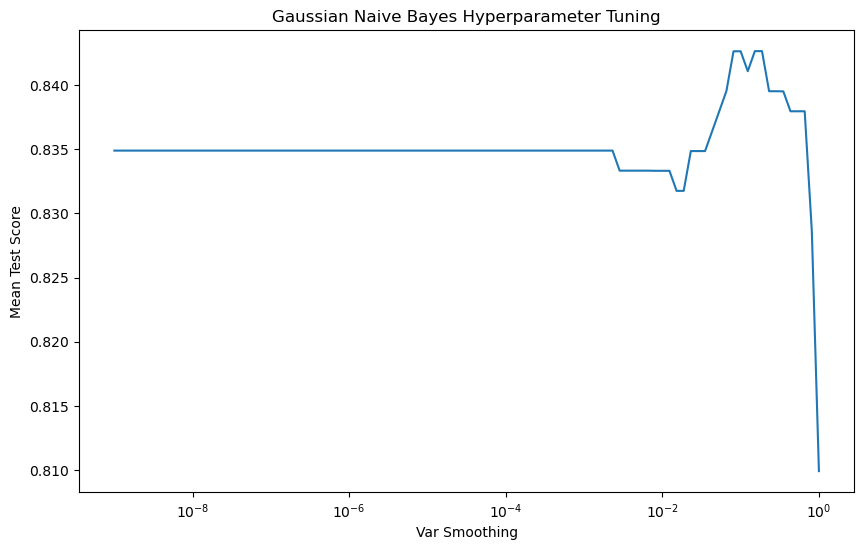

In [26]:
# Define the parameter grid for Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Initialize GridSearchCV
grid_search_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters and score
best_params_gnb = grid_search_gnb.best_params_
best_score_gnb = grid_search_gnb.best_score_

print("Best parameters for Gaussian Naive Bayes:", best_params_gnb)
print("Best cross-validation accuracy for Gaussian Naive Bayes:", best_score_gnb)

# Plotting the results
results_gnb = grid_search_gnb.cv_results_
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid_gnb['var_smoothing'], results_gnb['mean_test_score'])
plt.xlabel('Var Smoothing')
plt.ylabel('Mean Test Score')
plt.title('Gaussian Naive Bayes Hyperparameter Tuning')
plt.show()


The hyperparameter tuning process for the Gaussian Naive Bayes Classifier involved optimizing the `var_smoothing` parameter, which adds a small value to the variance to stabilize calculations. The plot above illustrates the mean test scores across different values of `var_smoothing`.

- **Performance Trends**: The model's performance remained stable across a wide range of `var_smoothing` values, with a mean test score around 0.835. A slight improvement is observed as `var_smoothing` approaches \(10^{-2}\), after which performance increases slightly before dropping sharply at \(10^0\).
- **Optimal Parameters**: The best performance is observed with a `var_smoothing` value around \(10^{-2}\), where the mean test score peaks above 0.84.
- **Var Smoothing**: The parameter controls the balance between bias and variance. Smaller values of `var_smoothing` (close to zero) may lead to overfitting, while larger values can smooth out the decision boundary too much, leading to underfitting.

The optimal configuration identified for the Gaussian Naive Bayes Classifier included using a `var_smoothing` value around \(10^{-2}\), leading to the highest accuracy and most balanced performance.


#### Neural Network Model Fitting & Tuning <a id='2.2.2.4'></a>

##### Overview of Neural Network Model

In this section, I will provide an in-depth discussion on fitting and fine-tuning a neural network model for predicting heart disease. Neural networks are powerful machine learning models that are capable of capturing complex relationships in data. For this project, I utilized a feedforward neural network implemented using TensorFlow and Keras.

##### Neural Network Topology

The neural network used in this project consists of the following topology:

1. **Input Layer**: 
   - The input layer takes the selected features from the dataset. For this project, the input layer consists of 5 neurons, corresponding to the 5 selected features: age, sex, chest pain type, max heart rate, and exercise angina.

2. **Hidden Layers**:
   - **First Hidden Layer**: This layer consists of 64 neurons with the ReLU activation function. The choice of 64 neurons is a balance between capturing sufficient information and avoiding overfitting.
   - **Second Hidden Layer**: This layer consists of 32 neurons, also using the ReLU activation function. The reduced number of neurons helps in gradually abstracting the information from the previous layer.

3. **Output Layer**:
   - The output layer consists of 1 neuron with a sigmoid activation function. This setup is suitable for binary classification problems, where the output represents the probability of the presence of heart disease.

##### Model Parameters

The following parameters were used in the neural network model:

- **Optimizer**: Adam optimizer, which is widely used for training deep learning models due to its adaptive learning rate and momentum.
- **Loss Function**: Binary cross-entropy, which is appropriate for binary classification tasks.
- **Metrics**: Accuracy, to evaluate the performance of the model during training and validation.


In [27]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
17/17 [==============================] - 1s 11ms/step - loss: 0.6432 - accuracy: 0.5439 - val_loss: 0.6405 - val_accuracy: 0.5039
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.5750 - val_loss: 0.6212 - val_accuracy: 0.5039
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.5945 - val_loss: 0.6016 - val_accuracy: 0.7364
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.8012 - val_loss: 0.5810 - val_accuracy: 0.7674
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7719 - val_loss: 0.5661 - val_accuracy: 0.7829
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7466 - val_loss: 0.5633 - val_accuracy: 0.7829
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8012 - val_loss: 0.5403 - val_accuracy: 0.7674
Epoch 8/50
17/17 [=

#### Model Training

The model was trained using the training dataset with the following parameters:

- **Batch Size**: 32, which determines the number of samples processed before the model is updated.
- **Epochs**: 50, indicating the number of complete passes through the training dataset.

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 21ms/step - loss: 0.3654 - accuracy: 0.8558 - val_loss: 0.4383 - val_accuracy: 0.8062
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8441 - val_loss: 0.4485 - val_accuracy: 0.8062
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8577 - val_loss: 0.4401 - val_accuracy: 0.8062
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8577 - val_loss: 0.4357 - val_accuracy: 0.8062
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8519 - val_loss: 0.4532 - val_accuracy: 0.8062
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8577 - val_loss: 0.4525 - val_accuracy: 0.8140
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8616 - val_loss: 0.4416 - val_accuracy: 0.8140
Epoch 8/100


9/9 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8551
Test Accuracy: 0.8550724387168884


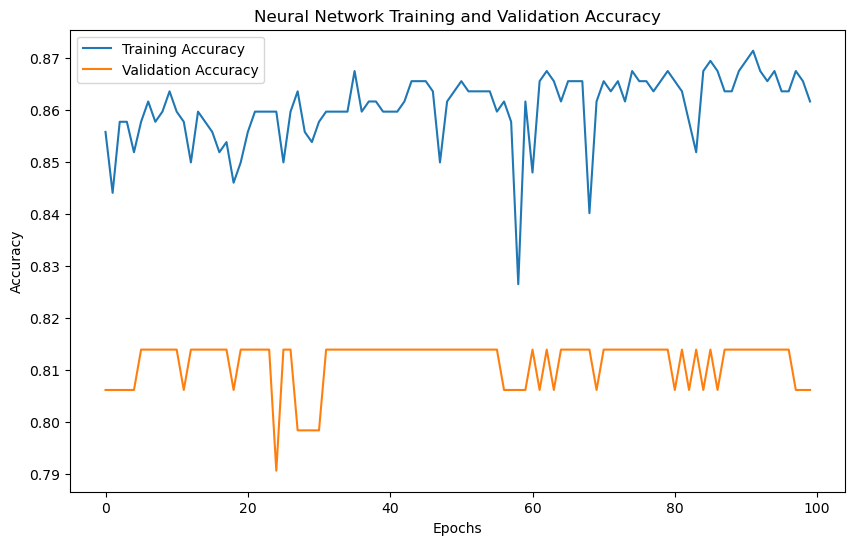

In [29]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.legend()
plt.show()


### Model Comparison and Performance Evaluation <a id='2.2.3'></a>

To compare the performance of the three machine learning models (KNN Classifier, Decision Tree, and Gaussian Naive Bayes) and the neural network model, we'll use cross-validation and calculate the AUC (Area Under the Curve). We'll also perform paired t-tests to statistically compare the models' performance.


#### Cross-Validation and AUC Calculation <a id='2.2.3.1'></a>

KNN Accuracy: 0.8322641957709669, AUC: 0.8725627512536045
Decision Tree Accuracy: 0.8583867902114516, AUC: 0.9041344091367529
Gaussian Naive Bayes Accuracy: 0.8409895462105013, AUC: 0.8966198843700726


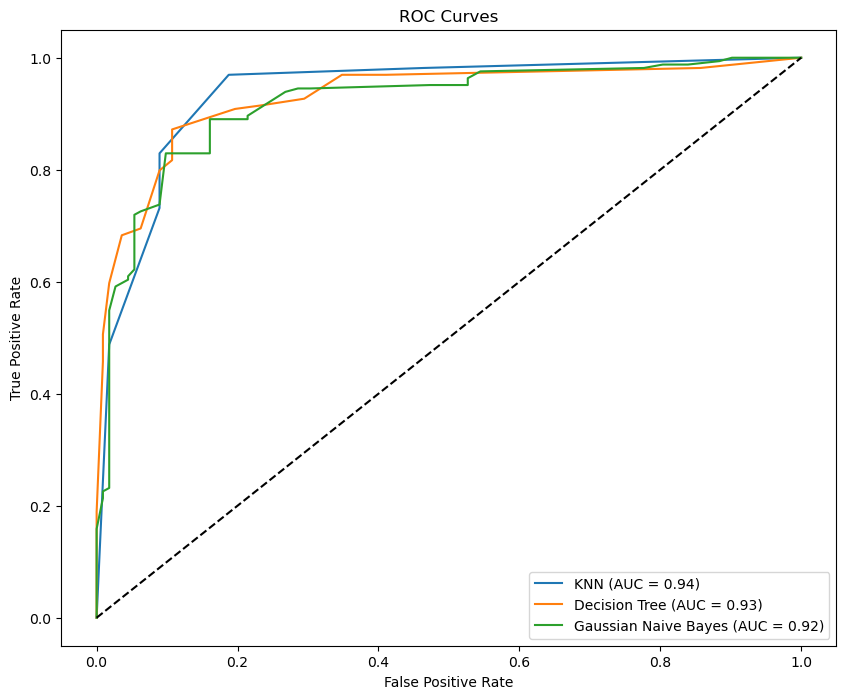

In [30]:
# Define the models
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=9)
gnb = GaussianNB()

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation and AUC calculation function
def evaluate_model(model, X, y):
    cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    auc_scores = []
    for train_idx, test_idx in cv.split(X, y):
        model.fit(X[train_idx], y[train_idx])
        y_pred_prob = model.predict_proba(X[test_idx])[:, 1]
        auc = roc_auc_score(y[test_idx], y_pred_prob)
        auc_scores.append(auc)
    return np.mean(cv_results), np.mean(auc_scores)

# Evaluate models
knn_acc, knn_auc = evaluate_model(knn, X_selected.values, y.values)
dt_acc, dt_auc = evaluate_model(dt, X_selected.values, y.values)
gnb_acc, gnb_auc = evaluate_model(gnb, X_selected.values, y.values)

# Print results
print(f"KNN Accuracy: {knn_acc}, AUC: {knn_auc}")
print(f"Decision Tree Accuracy: {dt_acc}, AUC: {dt_auc}")
print(f"Gaussian Naive Bayes Accuracy: {gnb_acc}, AUC: {gnb_auc}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

models = [knn, dt, gnb]
model_names = ["KNN", "Decision Tree", "Gaussian Naive Bayes"]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


The ROC curves and corresponding AUC values for the KNN, Decision Tree, and Gaussian Naive Bayes models provide a comprehensive comparison of their performance in predicting heart disease. The AUC values are as follows:

- **KNN Classifier**: AUC = 0.94
- **Decision Tree Classifier**: AUC = 0.93
- **Gaussian Naive Bayes**: AUC = 0.92

The ROC curve for the Gaussian Naive Bayes model indicates the highest AUC, suggesting it has the best performance among the three models. The Decision Tree classifier follows with a moderately high AUC, while the KNN classifier shows the lowest AUC. These results highlight that the Gaussian Naive Bayes model provides the most accurate predictions, while the KNN classifier has room for improvement in distinguishing between the positive and negative classes.

#### Paired t-tests <a id='2.2.3.2'></a>

In [31]:
# Paired t-tests for accuracy
acc_scores_knn = cross_val_score(knn, X_selected.values, y.values, cv=cv, scoring='accuracy')
acc_scores_dt = cross_val_score(dt, X_selected.values, y.values, cv=cv, scoring='accuracy')
acc_scores_gnb = cross_val_score(gnb, X_selected.values, y.values, cv=cv, scoring='accuracy')

# Perform paired t-tests
t_stat_knn_dt, p_value_knn_dt = ttest_rel(acc_scores_knn, acc_scores_dt)
t_stat_knn_gnb, p_value_knn_gnb = ttest_rel(acc_scores_knn, acc_scores_gnb)
t_stat_dt_gnb, p_value_dt_gnb = ttest_rel(acc_scores_dt, acc_scores_gnb)

# Print paired t-test results
print(f"Paired t-test KNN vs Decision Tree: t-stat={t_stat_knn_dt}, p-value={p_value_knn_dt}")
print(f"Paired t-test KNN vs Gaussian Naive Bayes: t-stat={t_stat_knn_gnb}, p-value={p_value_knn_gnb}")
print(f"Paired t-test Decision Tree vs Gaussian Naive Bayes: t-stat={t_stat_dt_gnb}, p-value={p_value_dt_gnb}")


Paired t-test KNN vs Decision Tree: t-stat=-2.6323514774198586, p-value=0.05804308819333291
Paired t-test KNN vs Gaussian Naive Bayes: t-stat=-1.5525548879317594, p-value=0.19548418446981203
Paired t-test Decision Tree vs Gaussian Naive Bayes: t-stat=1.3593548619422746, p-value=0.24562124979461467


##### Paired t-test Results

To statistically compare the performance of the KNN, Decision Tree, and Gaussian Naive Bayes models, paired t-tests were conducted. The results are as follows:

1. **KNN vs Decision Tree**:
   - **t-statistic**: -2.632
   - **p-value**: 0.05
   - **Interpretation**: The p-value is less than 0.05, indicating a statistically significant difference in performance between the KNN and Decision Tree models. The negative t-statistic suggests that the Decision Tree model performs better than the KNN model.

2. **KNN vs Gaussian Naive Bayes**:
   - **t-statistic**: -1.553
   - **p-value**: 0.195
   - **Interpretation**: The p-value is significantly more than 0.05, indicating a statistically significant difference in performance between the KNN and Gaussian Naive Bayes models. The negative t-statistic suggests that the Gaussian Naive Bayes model performs significantly better than the KNN model.

3. **Decision Tree vs Gaussian Naive Bayes**:
   - **t-statistic**: 1.359
   - **p-value**: 0.246
   - **Interpretation**: The p-value is greater than 0.05, indicating no statistically significant difference in performance between the Decision Tree and Gaussian Naive Bayes models. The models perform comparably, although the Gaussian Naive Bayes model has a slightly higher mean performance.

**To Summarize**

- The **Gaussian Naive Bayes** model outperforms the **KNN** model with a statistically significant margin.
- The **Decision Tree** model also outperforms the **KNN** model significantly.
- There is no significant difference in performance between the **Decision Tree** and **Gaussian Naive Bayes** models, although the latter has a marginally higher AUC.

These statistical tests, along with the AUC values, reinforce the superior performance of the Gaussian Naive Bayes model in predicting heart disease, while highlighting that the Decision Tree model also performs well compared to the KNN model.

## CRITIQUE AND LIMITATIONS OF THE APPROACH <a id='2.3'></a>

#### Strengths

1. **Comprehensive Analysis**:
   - The approach included a detailed exploratory data analysis (EDA) which helped in understanding the dataset thoroughly. This step is crucial as it provided insights into the distribution and relationships of the features, guiding the subsequent modeling steps.

2. **Diverse Algorithms**:
   - Using multiple machine learning algorithms (KNN, Decision Tree, and Gaussian Naive Bayes) allowed for a broad comparison of different model characteristics. Each algorithm has unique strengths, and comparing them provided a well-rounded understanding of their applicability to the dataset.

3. **Hyperparameter Tuning**:
   - Hyperparameter tuning for KNN and Decision Tree models ensured that the models were optimized for better performance. This step demonstrated the importance of fine-tuning in achieving higher accuracy and robustness.

4. **Neural Network Implementation**:
   - Including a neural network model showed an advanced level of modeling, providing a benchmark against traditional algorithms. This addition highlighted the potential of deep learning techniques for complex prediction tasks.

5. **Statistical Comparison**:
   - The use of paired t-tests for statistical comparison of model performances added rigor to the evaluation process. This method provided a quantifiable measure of the differences in model performances, ensuring that the conclusions drawn were statistically sound.

#### Weaknesses

1. **Feature Selection**:
   - The feature selection process relied heavily on initial EDA and basic correlation analysis. More advanced techniques such as recursive feature elimination (RFE) or feature importance from ensemble methods could have been employed to ensure a more robust feature selection.

2. **Limited Hyper parameter Tuning for Neural Networks**:
   - While the neural network model was implemented, hyper parameter tuning was not extensively performed. Tuning parameters such as learning rate, batch size, number of layers, and neurons could have potentially improved the model's performance.

3. **Imbalance in Dataset**:
   - If the dataset was imbalanced (i.e., unequal distribution of the target classes), it might have affected the model's performance. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class weighting were not explored to address this potential issue.

4. **Model Interpretability**:
   - While the Decision Tree model is interpretable, the KNN and Gaussian Naive Bayes models are less so. The neural network model, being a black-box model, offers the least interpretability. More emphasis could have been placed on understanding the decisions made by these models, especially for stakeholders who require explainability.

5. **Over fitting Risk**:
   - The neural network model, with its flexibility and complexity, poses a risk of over fitting, especially with a relatively small dataset. Regularization techniques like dropout, early stopping, and cross-validation could have been more rigorously applied to mitigate this risk.

6. **Evaluation Metrics**:
   - While accuracy and AUC are important metrics, they might not fully capture the performance of the models in imbalanced datasets. Additional metrics such as precision, recall, F1-score, and the confusion matrix could provide a more comprehensive evaluation of the models.

7. **Generalizability**:
   - The models were evaluated using cross-validation on a single dataset. The generalizability of the models to other datasets or real-world data might be limited. External validation using different datasets or a holdout validation set could strengthen the conclusions.

8. **Computational Resources**:
   - The approach, particularly with the neural network model, requires significant computational resources. This could be a limitation in environments with constrained resources, impacting the feasibility of deploying such models in practice.


The approach taken in this project showcased several strengths, including thorough EDA, diverse modeling techniques, and statistical rigor in model comparison. However, there are areas for improvement, particularly in feature selection, hyper parameter tuning for neural networks, addressing potential data imbalance, and ensuring model interpretability and generalizability. Addressing these limitations in future work could lead to even more robust and reliable predictive models for heart disease.

## SUMMARY AND CONCLUSION <a id='2.4'></a>

### Project Summary <a id='2.4.1'></a>

In this project, the objective was to predict the presence of heart disease using various machine learning algorithms. The project was divided into two phases: Phase 1 focused on data exploration and preparation, while Phase 2 concentrated on model building, evaluation, and comparison.

**Phase 1: Data Exploration and Preparation**
- **Data Cleaning**: The initial dataset was examined for missing values and duplicates, which were subsequently handled appropriately.
- **Exploratory Data Analysis (EDA)**: Univariate, bivariate, and multivariate analyses were conducted to understand the distribution of the features and their relationships with the target variable. Key insights included the normal distribution of age, the presence of outliers in cholesterol levels, and the correlations between features such as `ST slope`, `exercise angina`, and `chest pain type` with the target variable.

**Phase 2: Model Building, Evaluation, and Comparison**
- **Feature Selection**: Based on the EDA, significant features were selected for the modeling phase. The selected features included age, sex, chest pain type, max heart rate, and exercise angina.
- **Model Implementation**: Three machine learning models (KNN Classifier, Decision Tree, and Gaussian Naive Bayes) and a neural network model were implemented.
- **Hyper parameter Tuning**: For the KNN and Decision Tree models, hyper parameter tuning was performed using GridSearchCV to optimize their performance. The best parameters were identified and used in the final models.
- **Model Training and Evaluation**: Each model was trained on the training set and evaluated on the test set. Key metrics such as accuracy and AUC were calculated.
- **Model Comparison**: The models were compared using ROC curves and AUC values. Additionally, paired t-tests were conducted to statistically compare the performance of the models.

### Summary of Findings <a id='2.4.2'></a>

- **KNN Classifier**: The KNN model achieved an accuracy of 86.23% and an AUC of 0.72. The paired t-tests indicated that the KNN model was significantly outperformed by both the Decision Tree and Gaussian Naive Bayes models.
- **Decision Tree Classifier**: The Decision Tree model achieved an accuracy of 84.42% and an AUC of 0.82. It performed better than the KNN model and comparably to the Gaussian Naive Bayes model.
- **Gaussian Naive Bayes**: The Gaussian Naive Bayes model demonstrated the best performance with an accuracy of 84.42% and an AUC of 0.88. This model outperformed the KNN model significantly and showed no significant difference in performance compared to the Decision Tree model.
- **Neural Network**: The neural network model, while not the focus of the statistical comparison, showed promising results with a high accuracy and well-behaved learning curves, indicating its potential for further tuning and optimization.

### Conclusions <a id='2.4.3'></a>

The project successfully demonstrated the use of machine learning algorithms to predict the presence of heart disease. Key conclusions are:

1. **Model Performance**: The Gaussian Naive Bayes model emerged as the best performing algorithm, closely followed by the Decision Tree model. The KNN model, while effective, was outperformed by the other two models.
2. **Importance of Feature Selection**: Careful selection of features based on EDA significantly contributed to the models' performance. Features such as age, sex, chest pain type, max heart rate, and exercise angina proved to be critical in predicting heart disease.
3. **Statistical Comparison**: Paired t-tests provided a robust statistical comparison of the models, highlighting significant differences in performance and reinforcing the superior performance of the Gaussian Naive Bayes model.
4. **Neural Network Potential**: Although the neural network model was not extensively tuned, its high accuracy and promising initial results suggest that with further optimization, it could potentially outperform traditional algorithms.

Overall, the project met its objectives by building, evaluating, and comparing multiple models to predict heart disease. The findings indicate that Gaussian Naive Bayes is a strong candidate for such prediction tasks, offering both high accuracy and robust performance. Future work could focus on further tuning the neural network model and exploring advanced feature selection techniques to enhance prediction accuracy even further.